<h1>Import modules</h1>

In [6]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time
import healpy as hp

In [7]:
#mask file
file_mask = 'DES-mask-simple-ring-1024.fits'
#Read it
map_mask = hp.read_map(file_mask)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


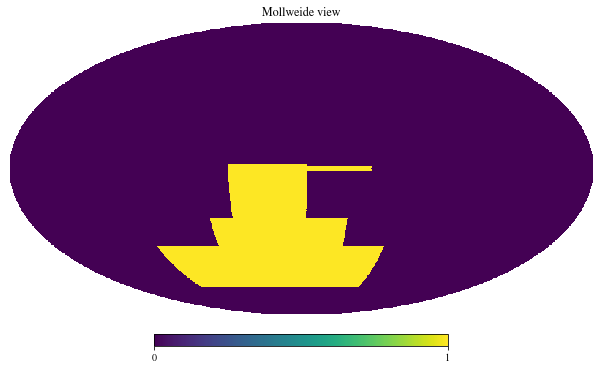

In [8]:
#Visualize it
hp.mollview(map_mask)

In [9]:
#Compute the power spectrum
LMAX    = 2048
cl_mask = hp.anafast(map_mask, lmax=LMAX)
ell     = np.arange(len(cl_mask))

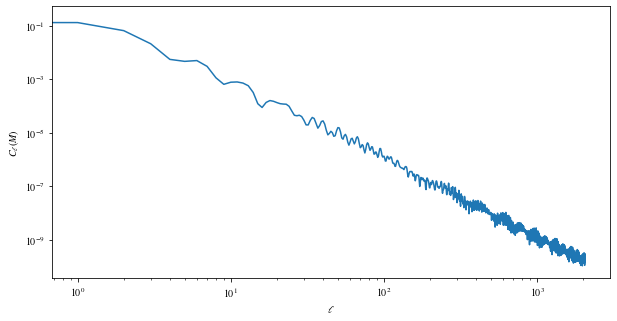

In [10]:
#Plot it
plt.figure(figsize=(10,5))
plt.loglog(ell,cl_mask)
plt.xlabel("$\ell$")
plt.ylabel("$C_{\ell}(M)$")
plt.show()

In [12]:
#Write the power spectrum to file
hp.write_cl("Cl-"+file_mask,cl_mask)

In [15]:
#Compute fsky from the mask
#Simplest manner: from the monopole
fsky_monop = np.sqrt(cl_mask[0]/(4*pi))
print(fsky_monop)
#Second manner: from the variance
fsky_sum = ((2*ell+1)/(4*pi)*cl_mask).sum()
print(fsky_sum)
#They give the same result for a binary mask (containing only 0 and 1)

0.12065496831550684
0.1205808084894223
